<a href="https://colab.research.google.com/github/daeunknown/deeplearning-2022-summer/blob/main/6_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 구현

단일 신경망 구현

In [3]:
import numpy as np
import matplotlib.pyplot as plt

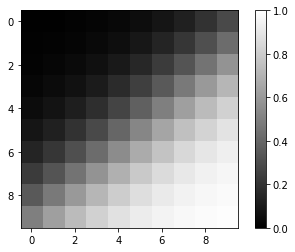

In [4]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x = 2.5
w_y = 3.0

bias = 0.1

for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1 / (1 + np.exp(-u))
        Z[j][i] = y
        
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

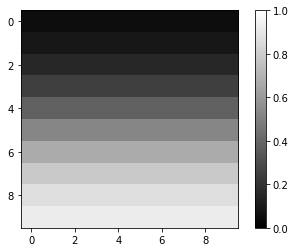

In [5]:
#가중치 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x = 0
w_y = 3.0

bias = 0.1

for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1 / (1 + np.exp(-u))
        Z[j][i] = y
        
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

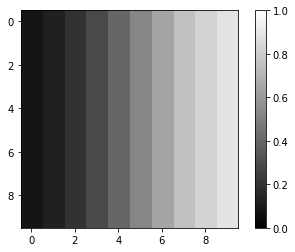

In [6]:
#가중치 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x = 2.5
w_y = 0

bias = 0.1

for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1 / (1 + np.exp(-u))
        Z[j][i] = y
        
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

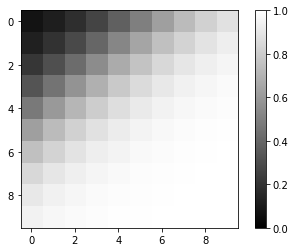

In [7]:
#편향 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x = 2.5
w_y = 3.0

bias = 3.0

for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1 / (1 + np.exp(-u))
        Z[j][i] = y
        
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

신경망(회귀) 구현

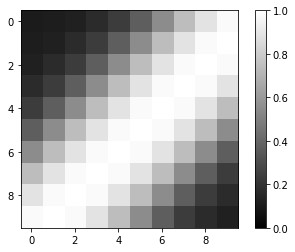

In [8]:
%matplotlib inline

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

#은닉층 가중치 (2X2 행렬)
w_im = np.array([[4.0, 4.0],
                [4.0, 4.0]])
#출력층 가중치 (2X1 행렬)
w_mo = np.array([[1.0],
               [-1.0]])

b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

신경망(분류) 구현

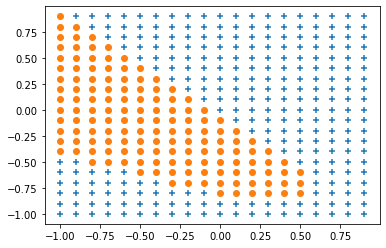

In [9]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)


#은닉층 가중치 (2X2 행렬)
w_im = np.array([[1.0, 2.0],
                [2.0, 3.0]])
#출력층 가중치 (2X1 행렬)
w_mo = np.array([[-1.0, 1.0],
               [1.0, -1.0]])

b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u))

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker = "+")
plt.scatter(x_2, y_2, marker = "o")
plt.show()